#1.Importar librerías

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#2.Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#3.Lectura de archivo

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/TrabajoAndres/Copie de Experiencia VIDAS serologia Dengue HOMIL, v20oct24.xlsx",header=1)

# Función para dividir y manejar división por cero
def dividir_con_manejo_de_errores(numerador, denominador):
    if denominador == 0:
        return np.nan  # Devuelve NaN para representar valores no válidos
    else:
        return numerador / denominador
# Aplicar trim a la columna 'columna_texto'
df['Dx'] = df['Dx'].str.strip()

# Convertir a mayúsculas la columna 'columna_texto'
df['Dx'] = df['Dx'].str.upper()

# Aplicar la función a las columnas
df['IgG/IgM'] = df.apply(lambda row: dividir_con_manejo_de_errores(row['Valor IgG (Pos ≥ 1)'], row['Valor IgM (Pos ≥ 1)']), axis=1)


df.head()

,Codigo,Nombre,documento,sexo,edad,ingreso HOMIL,Dx,dias de evolucion al momento de la serologia,Valor IgM (Pos ≥ 1),Valor IgG (Pos ≥ 1),Valor NS1 (Pos ≥ 1),"Cuando IgM e IgG positivas: Ratio IgG/IgM (≥ 1.10, secund); doi: 10.1186/s12879-016-2053-6.",IgG/IgM
0,H36,MARTA ADIELA BOTERO CARDONA,43156368,F,44,2023-06-11,PROBABLE DENGUE SECUNDARIO CON SIGNOS DE ALARMA,8,3,56,0,18.0,18.666667
1,H53,JENNY ALEXANDRA SALAMANCA,53128708,F,39,2023-08-30,DENGUE SECUNDARIO CON SIGNOS DE ALARMA,7,0,8,2,NaN,NaN
2,H54,FANNY AMPARO CRUZ LOPEZ,51844029,F,57,2023-09-01,DENGUE PRIMARIO CON SIGNOS DE ALARMA,7,2,0,107,NaN,0.000000
3,H88,LUIS ALFONSO GARCIA PIZA,81735209,M,39,2023-11-20,PROBABLE DENGUE SECUNDARIO CON SIGNOS DE ALARMA,6,1,46,0,28.0,46.000000
4,H91,LUIS ALFONSO SALDAÑA,356862,M,92,2023-11-24,DENGUE PRIMARIO SIN SIGNOS DE ALARMA,5,15,6,119,0.4,0.400000


#4.Análisis descriptivo


##4.1.Descripciones gráficas

###4.1.1 Sexo


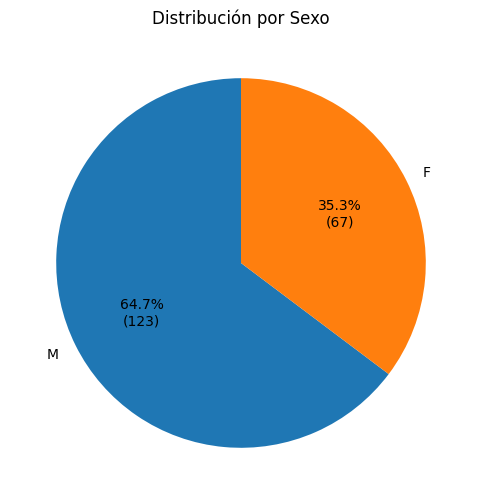

In [ ]:
# Contar las ocurrencias de cada categoría en la columna 'sexo'
sexo_counts = df['sexo'].value_counts()

# Crear el gráfico de torta
# Función para mostrar tanto el número como el porcentaje
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val})'
    return my_format

# Crear el gráfico de torta
plt.figure(figsize=(6, 6))  # Tamaño de la figura
plt.pie(sexo_counts, labels=sexo_counts.index, autopct=autopct_format(sexo_counts), startangle=90)
plt.title('Distribución por Sexo')
plt.show()

###4.1.2 Edad

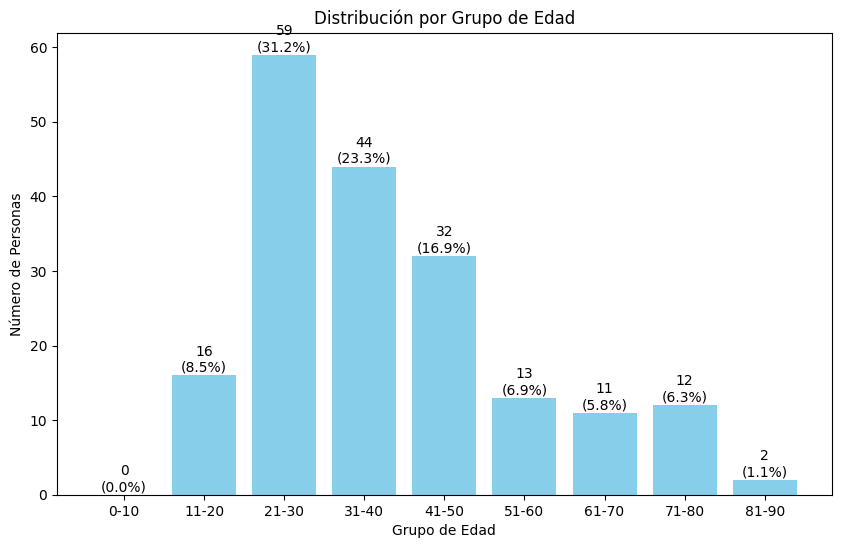

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
df['grupo_edad'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)

# Contar los valores en cada grupo de edad y calcular el porcentaje
grupo_counts = df['grupo_edad'].value_counts().sort_index()
grupo_percentages = 100 * grupo_counts / grupo_counts.sum()

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Barras para el número de personas
bars = ax.bar(grupo_counts.index, grupo_counts, color='skyblue', label='Número de personas')

# Añadir los porcentajes y el número en la parte superior de cada barra
for i, (count, pct) in enumerate(zip(grupo_counts, grupo_percentages)):
    ax.text(i, count + 0.5, f'{count}\n({pct:.1f}%)', ha='center', color='black')

# Etiquetas y título
ax.set_xlabel('Grupo de Edad')
ax.set_ylabel('Número de Personas')
ax.set_title('Distribución por Grupo de Edad')
plt.show()

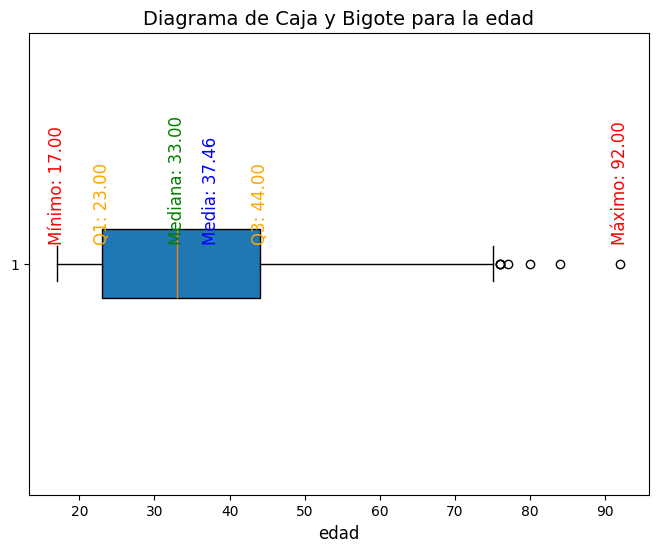

In [ ]:
# Crear el gráfico de caja y bigote
plt.figure(figsize=(8, 6))
plt.boxplot(df['edad'], vert=False, patch_artist=True)

# Calcular los valores estadísticos
mean = np.mean(df['edad'])
median = np.median(df['edad'])
q1 = np.percentile(df['edad'], 25)
q3 = np.percentile(df['edad'], 75)
min_value = np.min(df['edad'])
max_value = np.max(df['edad'])

# Añadir las etiquetas de los valores estadísticos con rotación vertical
plt.text(mean, 1.05, f'Media: {mean:.2f}', horizontalalignment='center', fontsize=12, color='blue', rotation=90)
plt.text(median, 1.05, f'Mediana: {median:.2f}', horizontalalignment='center', fontsize=12, color='green', rotation=90)
plt.text(q1, 1.05, f'Q1: {q1:.2f}', horizontalalignment='center', fontsize=12, color='orange', rotation=90)
plt.text(q3, 1.05, f'Q3: {q3:.2f}', horizontalalignment='center', fontsize=12, color='orange', rotation=90)
plt.text(min_value, 1.05, f'Mínimo: {min_value:.2f}', horizontalalignment='center', fontsize=12, color='red', rotation=90)
plt.text(max_value, 1.05, f'Máximo: {max_value:.2f}', horizontalalignment='center', fontsize=12, color='red', rotation=90)

# Añadir título y etiquetas
plt.title('Diagrama de Caja y Bigote para la edad', fontsize=14)
plt.xlabel('edad', fontsize=12)

# Mostrar el gráfico
plt.show()

###4.1.3 Diagnóstico

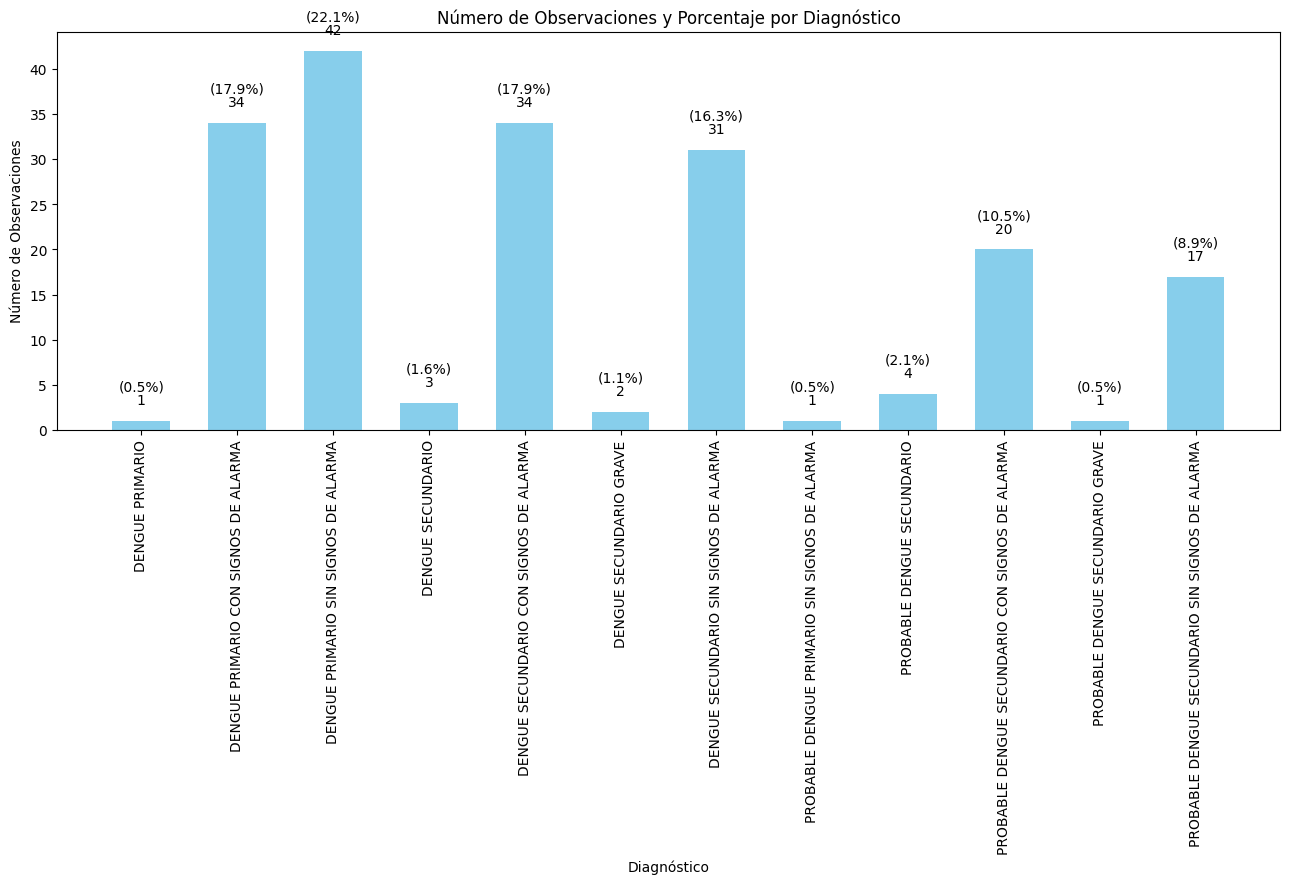

In [ ]:
# Supongamos que tienes el DataFrame `df` ya creado y con datos
# Contar el número de observaciones por categoría
counts = df['Dx'].value_counts().sort_index()

# Calcular el porcentaje de cada categoría
percentages = 100 * counts / counts.sum()

# Crear un DataFrame con el número y porcentaje
summary_df = pd.DataFrame({
    'Número de Observaciones': counts,
    'Porcentaje (%)': percentages
})

# Configurar el gráfico
fig, ax = plt.subplots(figsize=(13, 9))  # Aumentamos aún más el tamaño para más espacio
bars = ax.bar(summary_df.index, summary_df['Número de Observaciones'], color='skyblue', width=0.6)

# Añadir el número de observaciones y porcentaje en la parte superior de cada barra, ajustando la posición
for bar, pct in zip(bars, percentages):
    yval = bar.get_height()
    # Ajustamos la posición vertical para evitar superposición
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1.5, f'{int(yval)}', ha='center', va='bottom', fontsize=10)
    # Añadimos el porcentaje un poco más arriba
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 3, f'({pct:.1f}%)', ha='center', va='bottom', fontsize=10)

# Rotar las etiquetas del eje x para que sean verticales y ajustar su posición
ax.set_xticks(range(len(summary_df.index)))
ax.set_xticklabels(summary_df.index, rotation=90, ha='center')

# Etiquetas y título
ax.set_xlabel('Diagnóstico')
ax.set_ylabel('Número de Observaciones')
ax.set_title('Número de Observaciones y Porcentaje por Diagnóstico')

# Ajustar espaciado de las etiquetas y barras
plt.tight_layout()

plt.show()

In [ ]:
df['resultado Valor IgM'] = df['Valor IgM (Pos ≥ 1)'].apply(lambda x: 'Positivo' if x >= 1 else 'Negativo')

# Crear el gráfico con Plotly
fig = px.histogram(df, x="Dx", color="resultado Valor IgM",
                   category_orders={"resultado": ["Negativo", "Positivo"]},
                   title="Resultados de la prueba Valor IgM",
                   labels={"resultado": "Resultado de la prueba", "grupo": "Diagnóstico"},
                   barmode="stack",
                   text_auto=True)

# Personalizar el diseño
fig.update_layout(
    legend_title="Resultado de la prueba",
    legend=dict(font=dict(size=10, color='black')),
    xaxis_tickangle=90,  # Rotar las etiquetas de los grupos a 90 grados (vertical)
    xaxis_title="Diagnóstico",
    yaxis_title="Cantidad de Pacientes",
    font=dict(size=10),
    width=1200,
    height=800
)

# Mostrar el gráfico
fig.show()

In [ ]:
df['resultado Valor IgG'] = df['Valor IgG (Pos ≥ 1)'].apply(lambda x: 'Positivo' if x >= 1 else 'Negativo')



# Crear el gráfico con Plotly
fig = px.histogram(df, x="Dx", color="resultado Valor IgG",
                   category_orders={"resultado": ["Negativo", "Positivo"]},
                   title="Resultados de la prueba Valor IgG",
                   labels={"resultado": "Resultado de la prueba Valor IgG", "grupo": "Diagnóstico"},
                   barmode="stack",
                   text_auto=True)

# Personalizar el diseño
fig.update_layout(
    legend_title="Resultado de la prueba",
    legend=dict(font=dict(size=10, color='black')),
    xaxis_tickangle=90,  # Rotar las etiquetas de los grupos a 90 grados (vertical)
    xaxis_title="Diagnóstico",
    yaxis_title="Cantidad de Pacientes",
    font=dict(size=10),
    width=1200,
    height=800
)

# Mostrar el gráfico
fig.show()

In [ ]:
df['resultado Valor NS1'] = df['Valor NS1 (Pos ≥ 1)'].apply(lambda x: 'Positivo' if x >= 1 else 'Negativo')

# Crear el gráfico con Plotly
fig = px.histogram(df, x="Dx", color="resultado Valor NS1",
                   category_orders={"resultado": ["Negativo", "Positivo"]},
                   title="Resultados de la prueba Valor NS1",
                   labels={"resultado": "Resultado de la prueba Valor NS1", "grupo": "Diagnóstico"},
                   barmode="stack",
                   text_auto=True)

# Personalizar el diseño
fig.update_layout(
    legend_title="Resultado de la prueba",
    legend=dict(font=dict(size=10, color='black')),
    xaxis_tickangle=90,  # Rotar las etiquetas de los grupos a 90 grados (vertical)
    xaxis_title="Diagnóstico",
    yaxis_title="Cantidad de Pacientes",
    font=dict(size=10),
    width=1200,
    height=800
)

# Mostrar el gráfico
fig.show()

In [ ]:
"""Validar como manejar esta variable calculada cuando el numerador es cero o el denominador es cero  """

df['resultado IgG/IgM (ratio < 1.1)'] = df['IgG/IgM'].apply(lambda x: 'Positivo' if x < 1.1 else 'Negativo')


# Crear el gráfico con Plotly
fig = px.histogram(df, x="Dx", color="resultado IgG/IgM (ratio < 1.1)",
                   category_orders={"resultado": ["Negativo", "Positivo"]},
                   title="Resultados de la prueba resultado IgG/IgM (ratio < 1.1)",
                   labels={"resultado": "Resultado de la prueba resultado IgG/IgM (ratio < 1.1)", "grupo": "Diagnóstico"},
                   barmode="stack",
                   text_auto=True)

# Personalizar el diseño
fig.update_layout(
    legend_title="Resultado de la prueba",
    legend=dict(font=dict(size=10, color='black')),
    xaxis_tickangle=90,  # Rotar las etiquetas de los grupos a 90 grados (vertical)
    xaxis_title="Diagnóstico",
    yaxis_title="Cantidad de Pacientes",
    font=dict(size=10),
    width=1200,
    height=800
)

# Mostrar el gráfico
fig.show()

In [ ]:
"""Validar como manejar esta variable calculada cuando el numerador es cero o el denominador es cero  """

df['resultado IgG/IgM (ratio >= 1.1)'] = df['IgG/IgM'].apply(lambda x: 'Positivo' if x >= 1.1 else 'Negativo')


# Crear el gráfico con Plotly
fig = px.histogram(df, x="Dx", color="resultado IgG/IgM (ratio >= 1.1)",
                   category_orders={"resultado": ["Negativo", "Positivo"]},
                   title="Resultados de la prueba resultado IgG/IgM (ratio >= 1.1)",
                   labels={"resultado": "Resultado de la prueba resultado IgG/IgM (ratio >= 1.1))", "grupo": "Diagnóstico"},
                   barmode="stack",
                   text_auto=True)

# Personalizar el diseño
fig.update_layout(
    legend_title="Resultado de la prueba",
    legend=dict(font=dict(size=10, color='black')),
    xaxis_tickangle=90,  # Rotar las etiquetas de los grupos a 90 grados (vertical)
    xaxis_title="Diagnóstico",
    yaxis_title="Cantidad de Pacientes",
    font=dict(size=10),
    width=1200,
    height=800
)

# Mostrar el gráfico
fig.show()

###4.1.4 Días de evolución al momento de la serología (Diagrama de barras)

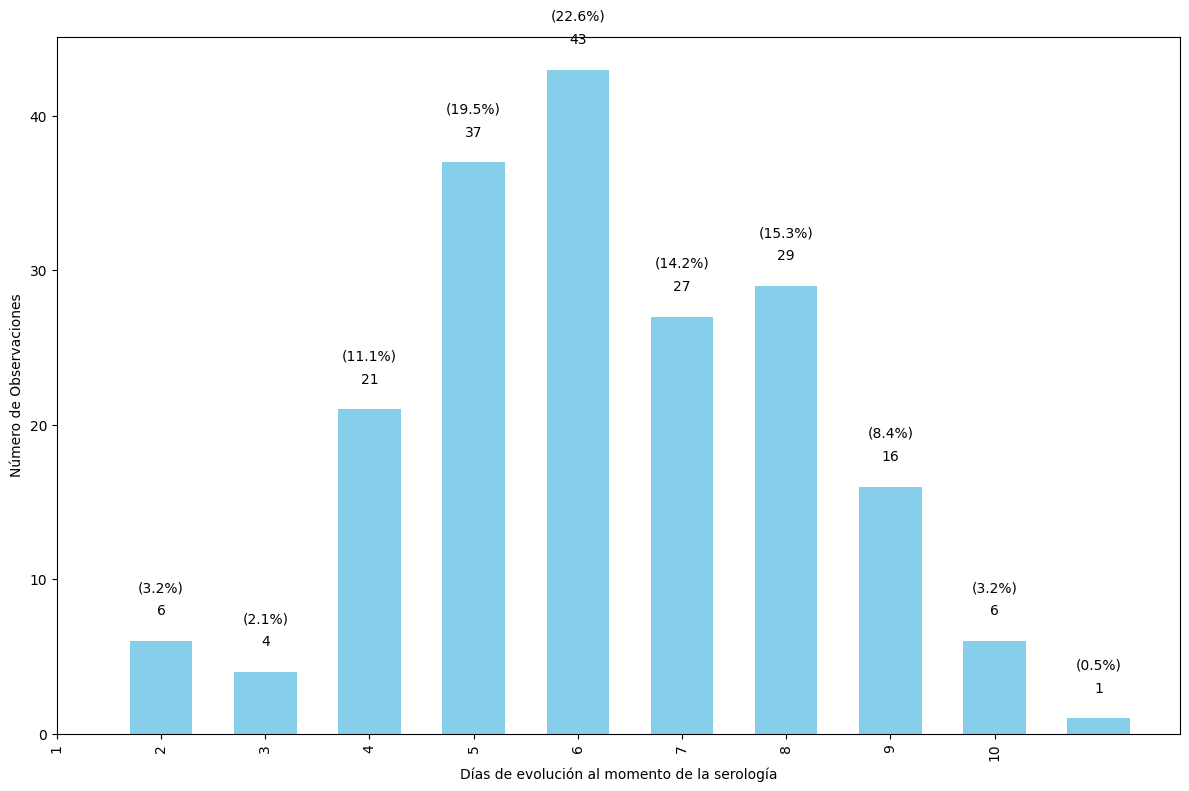

In [ ]:
# Supongamos que tienes el DataFrame `df` ya creado y con datos
# Contar el número de observaciones por categoría
counts = df['dias de evolucion al momento de la serologia'].value_counts().sort_index()

# Calcular el porcentaje de cada categoría
percentages = 100 * counts / counts.sum()

# Crear un DataFrame con el número y porcentaje
summary_df = pd.DataFrame({
    'Número de Observaciones': counts,
    'Porcentaje (%)': percentages
})

# Configurar el gráfico
fig, ax = plt.subplots(figsize=(12, 8))  # Aumentamos aún más el tamaño para más espacio
bars = ax.bar(summary_df.index, summary_df['Número de Observaciones'], color='skyblue', width=0.6)

# Añadir el número de observaciones y porcentaje en la parte superior de cada barra, ajustando la posición
for bar, pct in zip(bars, percentages):
    yval = bar.get_height()
    # Ajustamos la posición vertical para evitar superposición
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1.5, f'{int(yval)}', ha='center', va='bottom', fontsize=10)
    # Añadimos el porcentaje un poco más arriba
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 3, f'({pct:.1f}%)', ha='center', va='bottom', fontsize=10)

# Rotar las etiquetas del eje x para que sean verticales y ajustar su posición
ax.set_xticks(range(len(summary_df.index)))
ax.set_xticklabels(summary_df.index, rotation=90, ha='center')

# Etiquetas y título
ax.set_xlabel('Días de evolución al momento de la serología')
ax.set_ylabel('Número de Observaciones')


# Ajustar espaciado de las etiquetas y barras
plt.tight_layout()

plt.show()

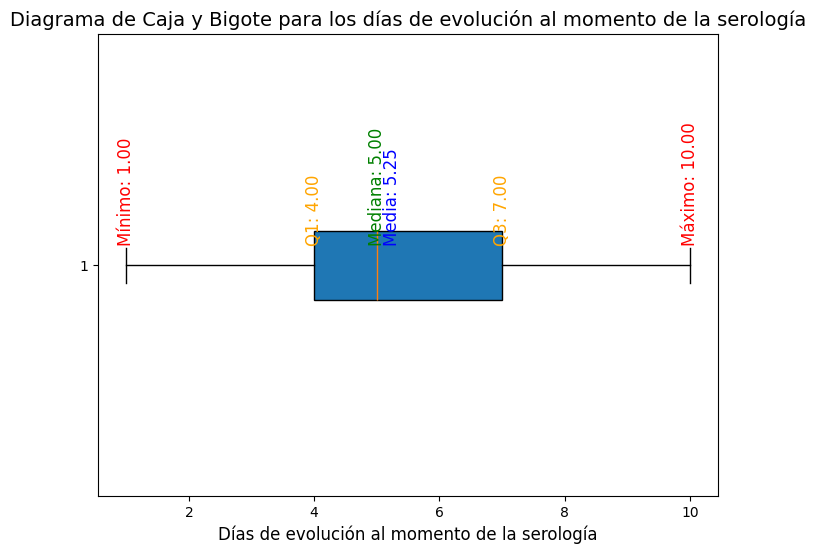

In [ ]:
# Crear el gráfico de caja y bigote
plt.figure(figsize=(8, 6))
plt.boxplot(df['dias de evolucion al momento de la serologia'], vert=False, patch_artist=True)

# Calcular los valores estadísticos
mean = np.mean(df['dias de evolucion al momento de la serologia'])
median = np.median(df['dias de evolucion al momento de la serologia'])
q1 = np.percentile(df['dias de evolucion al momento de la serologia'], 25)
q3 = np.percentile(df['dias de evolucion al momento de la serologia'], 75)
min_value = np.min(df['dias de evolucion al momento de la serologia'])
max_value = np.max(df['dias de evolucion al momento de la serologia'])

# Añadir las etiquetas de los valores estadísticos con rotación vertical
plt.text(mean, 1.05, f'Media: {mean:.2f}', horizontalalignment='center', fontsize=12, color='blue', rotation=90)
plt.text(median, 1.05, f'Mediana: {median:.2f}', horizontalalignment='center', fontsize=12, color='green', rotation=90)
plt.text(q1, 1.05, f'Q1: {q1:.2f}', horizontalalignment='center', fontsize=12, color='orange', rotation=90)
plt.text(q3, 1.05, f'Q3: {q3:.2f}', horizontalalignment='center', fontsize=12, color='orange', rotation=90)
plt.text(min_value, 1.05, f'Mínimo: {min_value:.2f}', horizontalalignment='center', fontsize=12, color='red', rotation=90)
plt.text(max_value, 1.05, f'Máximo: {max_value:.2f}', horizontalalignment='center', fontsize=12, color='red', rotation=90)

# Añadir título y etiquetas
plt.title('Diagrama de Caja y Bigote para los días de evolución al momento de la serología', fontsize=14)
plt.xlabel('Días de evolución al momento de la serología', fontsize=12)

# Mostrar el gráfico
plt.show()

### Días de evolución al momento de la serología (Histograma)

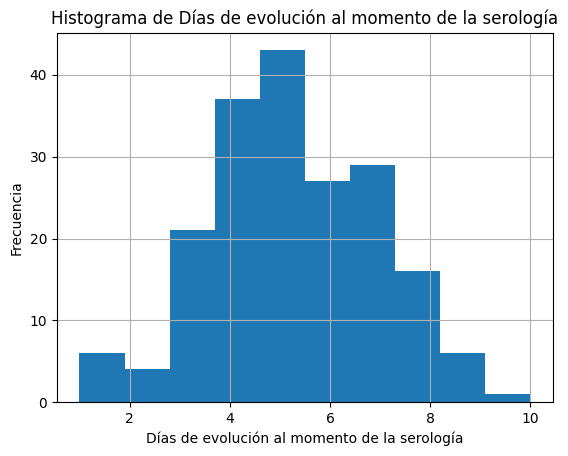

In [ ]:
df['dias de evolucion al momento de la serologia'].hist()
plt.title('Histograma de Días de evolución al momento de la serología')
plt.xlabel('Días de evolución al momento de la serología')
plt.ylabel('Frecuencia')
plt.show()

### 4.1.5 Valor IgM (Pos ≥ 1)

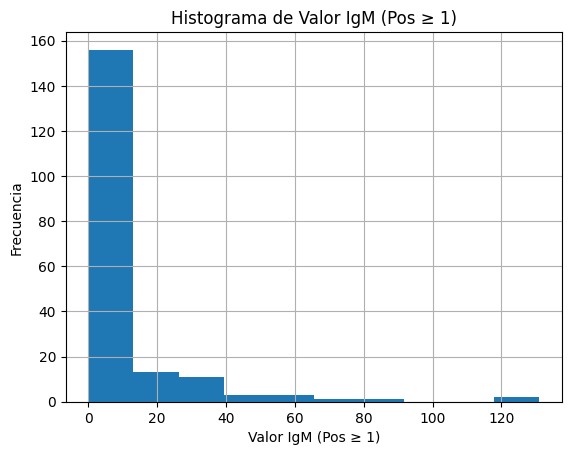

In [ ]:
df['Valor IgM (Pos ≥ 1)'].hist()
plt.title('Histograma de Valor IgM (Pos ≥ 1)')
plt.xlabel('Valor IgM (Pos ≥ 1)')
plt.ylabel('Frecuencia')
plt.show()

### 4.1.6 Valor IgG (Pos ≥ 1)

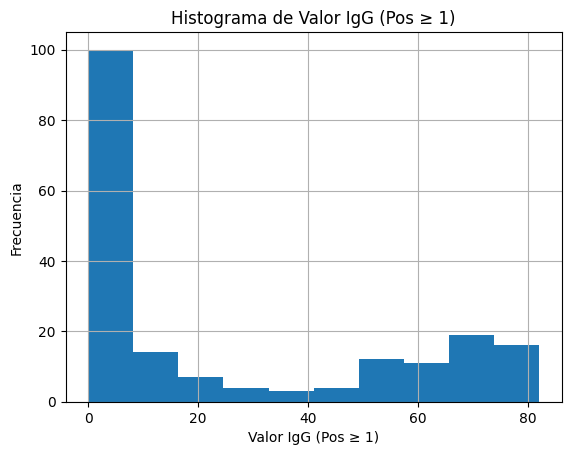

In [ ]:
#df['Valor IgG (Pos ≥ 1)'] = pd.to_numeric(df['Valor IgG (Pos ≥ 1)'], errors='coerce')

df['Valor IgG (Pos ≥ 1)'].hist()
plt.title('Histograma de Valor IgG (Pos ≥ 1)')
plt.xlabel('Valor IgG (Pos ≥ 1)')
plt.ylabel('Frecuencia')
plt.show()

###4.1.7 Valor NS1 (Pos ≥ 1)

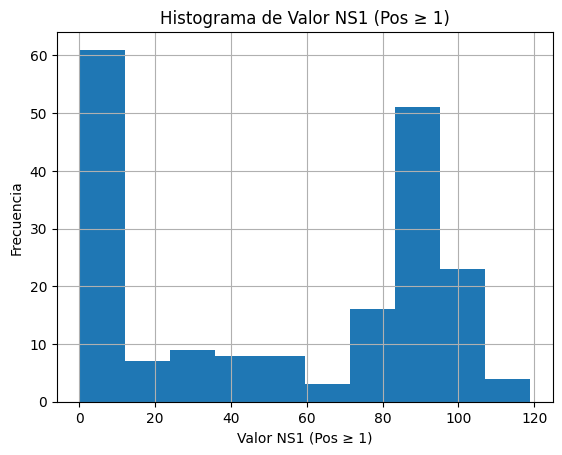

In [ ]:
#df['Valor NS1 (Pos ≥ 1)'] = pd.to_numeric(df['Valor NS1 (Pos ≥ 1)'], errors='coerce')

df['Valor NS1 (Pos ≥ 1)'].hist()
plt.title('Histograma de Valor NS1 (Pos ≥ 1)')
plt.xlabel('Valor NS1 (Pos ≥ 1)')
plt.ylabel('Frecuencia')
plt.show()

###4.1.8 IgG/IgM

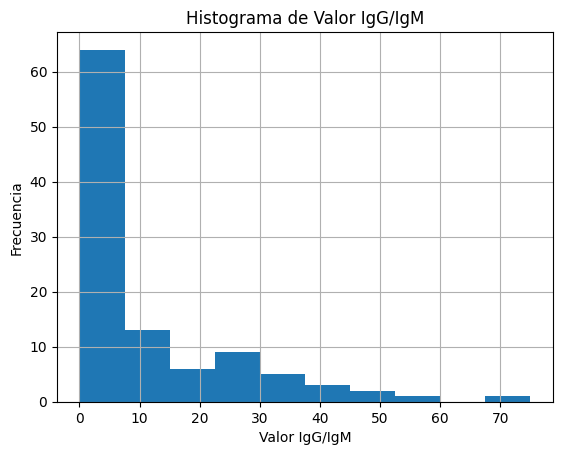

In [ ]:
df['IgG/IgM'].hist()
plt.title('Histograma de Valor IgG/IgM')
plt.xlabel('Valor IgG/IgM')
plt.ylabel('Frecuencia')
plt.show()

###4.1.9 Revisión  valores atípicos o extremos

####4.1.9.1  IgG/IgM

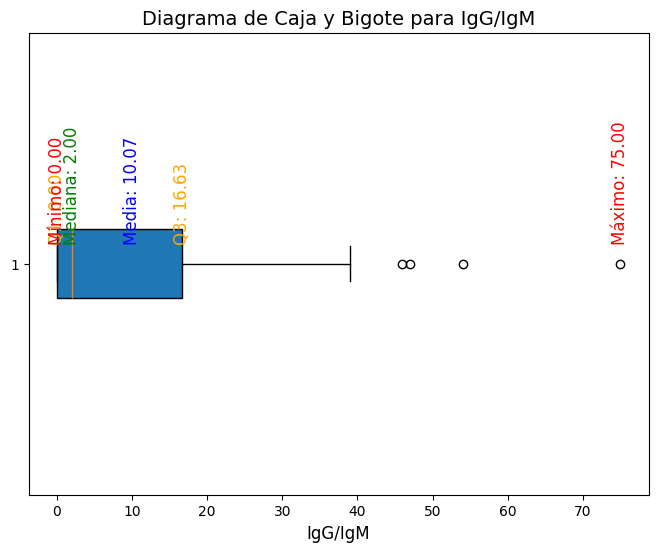

In [ ]:
# Crear el gráfico de caja y bigote
plt.figure(figsize=(8, 6))
df_sin_nulos_col1 = df[df['IgG/IgM'].notnull()]
plt.boxplot(df_sin_nulos_col1['IgG/IgM'], vert=False, patch_artist=True)


# Calcular los valores estadísticos
mean = np.mean(df_sin_nulos_col1['IgG/IgM'])
median = np.median(df_sin_nulos_col1['IgG/IgM'])
q1 = np.percentile(df_sin_nulos_col1['IgG/IgM'], 25)
q3 = np.percentile(df_sin_nulos_col1['IgG/IgM'], 75)
min_value = np.min(df_sin_nulos_col1['IgG/IgM'])
max_value = np.max(df_sin_nulos_col1['IgG/IgM'])

# Añadir las etiquetas de los valores estadísticos con rotación vertical
plt.text(mean, 1.05, f'Media: {mean:.2f}', horizontalalignment='center', fontsize=12, color='blue', rotation=90)
plt.text(median, 1.05, f'Mediana: {median:.2f}', horizontalalignment='center', fontsize=12, color='green', rotation=90)
plt.text(q1, 1.05, f'Q1: {q1:.2f}', horizontalalignment='center', fontsize=12, color='orange', rotation=90)
plt.text(q3, 1.05, f'Q3: {q3:.2f}', horizontalalignment='center', fontsize=12, color='orange', rotation=90)
plt.text(min_value, 1.05, f'Mínimo: {min_value:.2f}', horizontalalignment='center', fontsize=12, color='red', rotation=90)
plt.text(max_value, 1.05, f'Máximo: {max_value:.2f}', horizontalalignment='center', fontsize=12, color='red', rotation=90)

# Añadir título y etiquetas
plt.title('Diagrama de Caja y Bigote para IgG/IgM', fontsize=14)
plt.xlabel('IgG/IgM', fontsize=12)

# Mostrar el gráfico
plt.show()

####4.1.9.2  Valor IgM (Pos ≥ 1), Valor IgG (Pos ≥ 1) y Valor NS1 (Pos ≥ 1)

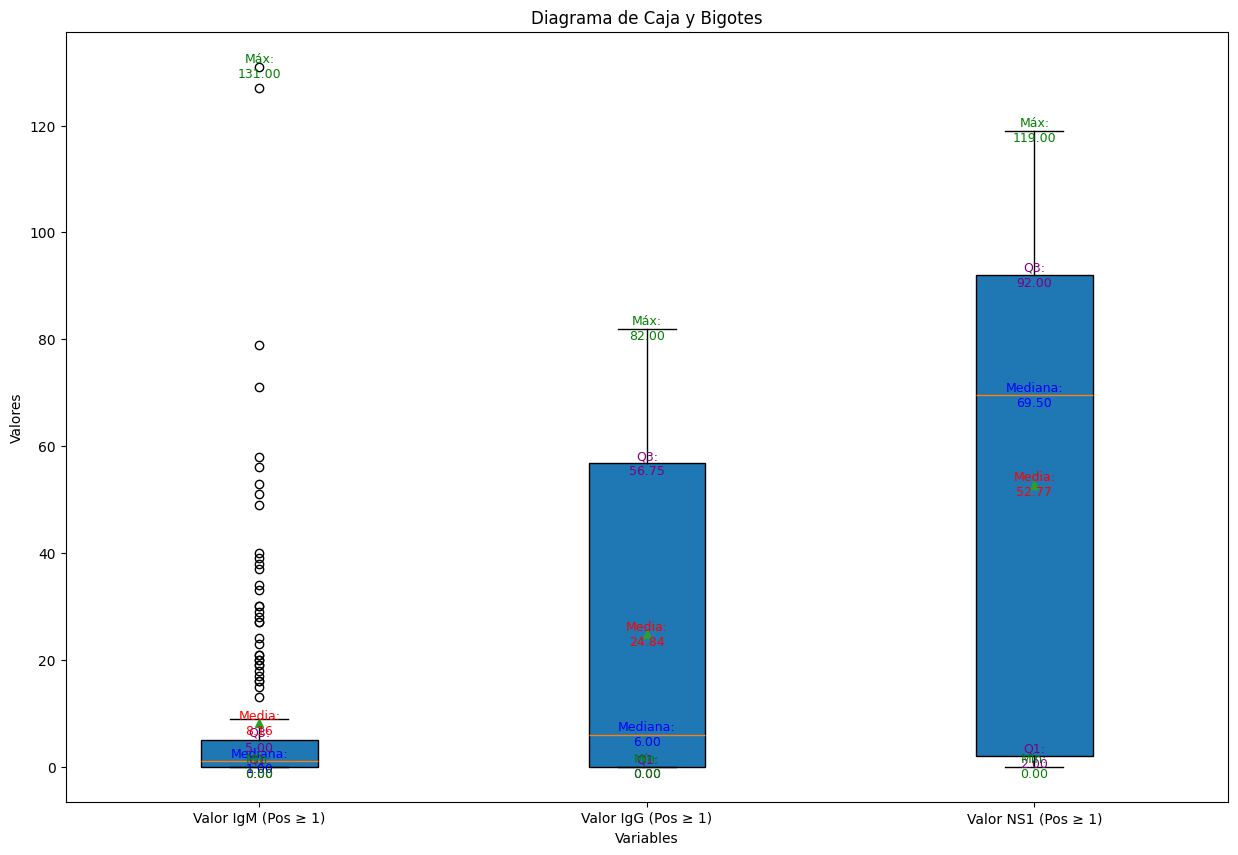

In [ ]:
# Definir el tamaño del gráfico
plt.figure(figsize=(15, 10))

# Crear el boxplot desde el DataFrame
box = plt.boxplot([df['Valor IgM (Pos ≥ 1)'], df['Valor IgG (Pos ≥ 1)'], df['Valor NS1 (Pos ≥ 1)']],
                  labels=['Valor IgM (Pos ≥ 1)', 'Valor IgG (Pos ≥ 1)', 'Valor NS1 (Pos ≥ 1)'],
                  patch_artist=True,  # Relleno de color en el boxplot
                  showmeans=True)     # Mostrar la media

# Agregar título y etiquetas
plt.title('Diagrama de Caja y Bigotes')
plt.ylabel('Valores')
plt.xlabel('Variables')

# Extraer los datos de cada boxplot para colocar las etiquetas
for i, col in enumerate(['Valor IgM (Pos ≥ 1)', 'Valor IgG (Pos ≥ 1)', 'Valor NS1 (Pos ≥ 1)'], 1):
    col_data = df[col].dropna()
    median = np.median(col_data)
    q1 = np.percentile(col_data, 25)
    q3 = np.percentile(col_data, 75)
    min_val = np.min(col_data)
    max_val = np.max(col_data)
    mean = np.mean(col_data)

    # Añadir etiquetas
    plt.text(i, median, f'Mediana:\n{median:.2f}', ha='center', va='center', fontsize=9, color='blue')
    plt.text(i, q1, f'Q1:\n{q1:.2f}', ha='center', va='center', fontsize=9, color='purple')
    plt.text(i, q3, f'Q3:\n{q3:.2f}', ha='center', va='center', fontsize=9, color='purple')
    plt.text(i, min_val, f'Mín:\n{min_val:.2f}', ha='center', va='center', fontsize=9, color='green')
    plt.text(i, max_val, f'Máx:\n{max_val:.2f}', ha='center', va='center', fontsize=9, color='green')
    plt.text(i, mean, f'Media:\n{mean:.2f}', ha='center', va='center', fontsize=9, color='red')

# Mostrar el gráfico
plt.show()

##4.2 Descripciones númericas variables cuantitativas

In [ ]:
"""
count: Número de registros
mean: media
std : desviación estándar
min:minímo
25% : Cuartil 1
50% :Cuartil 2
75%	: Cuartil 3
max: máximo
"""
df_cuantitativas = df[['edad','dias de evolucion al momento de la serologia','Valor IgM (Pos ≥ 1)','Valor IgG (Pos ≥ 1)','Valor NS1 (Pos ≥ 1)','IgG/IgM']]
df_cuantitativas.describe()


,edad,dias de evolucion al momento de la serologia,Valor IgM (Pos ≥ 1),Valor IgG (Pos ≥ 1),Valor NS1 (Pos ≥ 1),IgG/IgM
count,190.000000,190.000000,190.000000,190.000000,190.000000,104.000000
mean,37.463158,5.247368,8.163158,24.836842,52.773684,10.065539
std,17.062791,1.853602,18.594239,29.783162,41.665033,14.691909
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,4.000000,0.000000,0.000000,2.000000,0.000000
50%,33.000000,5.000000,1.000000,6.000000,69.500000,2.000000
75%,44.000000,7.000000,5.000000,56.750000,92.000000,16.633333
max,92.000000,10.000000,131.000000,82.000000,119.000000,75.000000


##4.2 Descripciones númericas variables cualitativas

In [ ]:
"""
count: Número de registros
unique: Número de valores únicos
top: moda
fred: Número de veces que se repite la categoría con mayor frecuencia
"""

df_cualitativas = df[['sexo','Dx']]
df_cualitativas.describe()

,sexo,Dx
count,190,190
unique,2,12
top,M,DENGUE PRIMARIO SIN SIGNOS DE ALARMA
freq,123,42


#5. Análisis basado en temporalidad y los que reportaron NS1 positivo (Importante)

In [ ]:
# Contar la frecuencia de cada categoría y calcular los porcentajes
conteo_categorias = df['resultado Valor NS1'].value_counts()
porcentajes = conteo_categorias / conteo_categorias.sum() * 100

# Crear un DataFrame con los resultados
resultado = pd.DataFrame({'Total': conteo_categorias, 'Porcentaje': porcentajes})

# Agregar una fila con los totales generales
totales = pd.DataFrame({'Total': resultado['Total'].sum(), 'Porcentaje': 100}, index=['Total General'])
resultado = pd.concat([resultado, totales])

resultado

,Total,Porcentaje
Positivo,147,77.368421
Negativo,43,22.631579
Total General,190,100.000000


##5.1 Análisis para cuando resultado Valor NS1 es >= 1

---



In [ ]:
df.loc[:, 'frontera_de_tiempo'] = np.where(df['dias de evolucion al momento de la serologia'] <= 5, '<= 5', '> 5')

df_analisis = df[(df['resultado Valor NS1'] == 'Positivo')]

# Contar la frecuencia de cada categoría y calcular los porcentajes
conteo_categorias = df_analisis['frontera_de_tiempo'].value_counts()
porcentajes = conteo_categorias / conteo_categorias.sum() * 100

# Crear un DataFrame con los resultados
resultado = pd.DataFrame({'Total': conteo_categorias, 'Porcentaje': porcentajes})

# Agregar una fila con los totales generales
totales = pd.DataFrame({'Total': resultado['Total'].sum(), 'Porcentaje': 100}, index=['Total General'])
resultado = pd.concat([resultado, totales])
resultado

,Total,Porcentaje
<= 5,98,66.666667
> 5,49,33.333333
Total General,147,100.000000


##5.1 Análisis para cuando resultado Valor NS1 es >= 1 y dias de evolucion al momento de la serologia <= 5


In [ ]:
df_analisis_5 = df_analisis[(df_analisis['dias de evolucion al momento de la serologia'] <= 5)]

df_analisis_5['Just NSQ positive'] = np.where(
    (df_analisis_5['resultado Valor NS1'] == 'Positivo') &
    (df_analisis_5['resultado Valor IgM'] == 'Negativo') &
    (df_analisis_5['resultado Valor IgG'] == 'Negativo'),
    1,
    0)

df_analisis_5['NS1/IgM'] = np.where(
    (df_analisis_5['resultado Valor NS1'] == 'Positivo') &
    (df_analisis_5['resultado Valor IgM'] == 'Positivo') &
    (df_analisis_5['resultado Valor IgG'] == 'Negativo'),
    1,
    0)

df_analisis_5['NS1/IgG'] = np.where(
    (df_analisis_5['resultado Valor NS1'] == 'Positivo') &
    (df_analisis_5['resultado Valor IgM'] == 'Negativo') &
    (df_analisis_5['resultado Valor IgG'] == 'Positivo'),
    1,
    0)

df_analisis_5['NS1/IgM/IgG positive (IgG/IgM (ratio < 1.1))'] = np.where(
    (df_analisis_5['resultado Valor NS1'] == 'Positivo') &
    (df_analisis_5['resultado Valor IgM'] == 'Positivo') &
    (df_analisis_5['resultado Valor IgG'] == 'Positivo') &
     (df_analisis_5['IgG/IgM'] < 1.1 ),
    1,
    0)
df_analisis_5['NS1/IgM/IgG positive (IgG/IgM (ratio >= 1.1))'] = np.where(
    (df_analisis_5['resultado Valor NS1'] == 'Positivo') &
    (df_analisis_5['resultado Valor IgM'] == 'Positivo') &
    (df_analisis_5['resultado Valor IgG'] == 'Positivo') &
    (df_analisis_5['IgG/IgM'] >= 1.1 ),
    1,
    0)

df_resumen = df_analisis_5[['Just NSQ positive','NS1/IgM','NS1/IgG','NS1/IgM/IgG positive (IgG/IgM (ratio < 1.1))','NS1/IgM/IgG positive (IgG/IgM (ratio >= 1.1))']]

# Contar el número de unos en cada columna
count_ones = df_resumen.apply(lambda x: (x == 1).sum())

# Calcular el total de unos en todas las columnas
total_ones = count_ones.sum()

# Calcular el porcentaje de unos en cada columna respecto al total
percentage = (count_ones / total_ones) * 100

# Crear un DataFrame con los resultados
result = pd.DataFrame({
    'Prueba': df_resumen.columns,
    'Conteo': count_ones.values,
    'Porcentaje': percentage.values
})

result

,Prueba,Conteo,Porcentaje
0,Just NSQ positive,26,26.530612
1,NS1/IgM,16,16.326531
2,NS1/IgG,33,33.673469
3,NS1/IgM/IgG positive (IgG/IgM (ratio < 1.1)),6,6.122449
4,NS1/IgM/IgG positive (IgG/IgM (ratio >= 1.1)),17,17.346939


In [ ]:
df_analisis_5_Me = df_analisis_5[['Valor NS1 (Pos ≥ 1)','Valor IgM (Pos ≥ 1)','Valor IgG (Pos ≥ 1)','IgG/IgM']]
df_result_5 = df_analisis_5_Me.describe(
    ).transpose()

df_result_5 = df_result_5.rename(columns={'50%': 'median'})
df_result_5

,count,mean,std,min,25%,median,75%,max
Valor NS1 (Pos ≥ 1),98.0,67.275510,34.527975,1.0,36.0,86.000000,94.0,119.0
Valor IgM (Pos ≥ 1),98.0,4.500000,11.997637,0.0,0.0,0.000000,2.0,79.0
Valor IgG (Pos ≥ 1),98.0,13.928571,22.959961,0.0,0.0,2.000000,14.0,78.0
IgG/IgM,39.0,8.750687,16.177590,0.0,0.0,0.297297,11.0,75.0


#5.2 Análisis para cuando resultado Valor NS1 es >= 1 y dias de evolucion al momento de la serologia > 5

In [ ]:
df_analisis_M5 = df_analisis[(df_analisis['dias de evolucion al momento de la serologia'] > 5)]

df_analisis_M5['Just NSQ positive'] = np.where(
    (df_analisis_M5['resultado Valor NS1'] == 'Positivo') &
    (df_analisis_M5['resultado Valor IgM'] == 'Negativo') &
    (df_analisis_M5['resultado Valor IgG'] == 'Negativo'),
    1,
    0)

df_analisis_M5['NS1/IgM'] = np.where(
    (df_analisis_M5['resultado Valor NS1'] == 'Positivo') &
    (df_analisis_M5['resultado Valor IgM'] == 'Positivo') &
    (df_analisis_M5['resultado Valor IgG'] == 'Negativo'),
    1,
    0)

df_analisis_M5['NS1/IgG'] = np.where(
    (df_analisis_M5['resultado Valor NS1'] == 'Positivo') &
    (df_analisis_M5['resultado Valor IgM'] == 'Negativo') &
    (df_analisis_M5['resultado Valor IgG'] == 'Positivo'),
    1,
    0)

df_analisis_M5['NS1/IgM/IgG positive (IgG/IgM (ratio < 1.1))'] = np.where(
    (df_analisis_M5['resultado Valor NS1'] == 'Positivo') &
    (df_analisis_M5['resultado Valor IgM'] == 'Positivo') &
    (df_analisis_M5['resultado Valor IgG'] == 'Positivo') &
     (df_analisis_M5['IgG/IgM'] < 1.1 ),
    1,
    0)
df_analisis_M5['NS1/IgM/IgG positive (IgG/IgM (ratio >= 1.1))'] = np.where(
    (df_analisis_M5['resultado Valor NS1'] == 'Positivo') &
    (df_analisis_M5['resultado Valor IgM'] == 'Positivo') &
    (df_analisis_M5['resultado Valor IgG'] == 'Positivo') &
    (df_analisis_M5['IgG/IgM'] >= 1.1 ),
    1,
    0)

df_resumen = df_analisis_M5[['Just NSQ positive','NS1/IgM','NS1/IgG','NS1/IgM/IgG positive (IgG/IgM (ratio < 1.1))','NS1/IgM/IgG positive (IgG/IgM (ratio >= 1.1))']]

# Contar el número de unos en cada columna
count_ones = df_resumen.apply(lambda x: (x == 1).sum())

# Calcular el total de unos en todas las columnas
total_ones = count_ones.sum()

# Calcular el porcentaje de unos en cada columna respecto al total
percentage = (count_ones / total_ones) * 100

# Crear un DataFrame con los resultados
result = pd.DataFrame({
    'Prueba': df_resumen.columns,
    'Conteo': count_ones.values,
    'Porcentaje': percentage.values
})

result

,Prueba,Conteo,Porcentaje
0,Just NSQ positive,5,10.204082
1,NS1/IgM,13,26.530612
2,NS1/IgG,9,18.367347
3,NS1/IgM/IgG positive (IgG/IgM (ratio < 1.1)),11,22.448980
4,NS1/IgM/IgG positive (IgG/IgM (ratio >= 1.1)),11,22.448980


In [ ]:
df_analisis_M5_Me = df_analisis_M5[['Valor NS1 (Pos ≥ 1)','Valor IgM (Pos ≥ 1)','Valor IgG (Pos ≥ 1)','IgG/IgM']]
df_result_M5 = df_analisis_M5_Me.describe(
    ).transpose()

df_result_M5 = df_result_M5.rename(columns={'50%': 'median'})
df_result_M5

,count,mean,std,min,25%,median,75%,max
Valor NS1 (Pos ≥ 1),49.0,70.081633,34.584339,1.0,51.0,86.000000,94.000000,107.0
Valor IgM (Pos ≥ 1),49.0,15.020408,24.186334,0.0,0.0,3.000000,23.000000,127.0
Valor IgG (Pos ≥ 1),49.0,18.040816,28.645796,0.0,0.0,2.000000,16.000000,82.0
IgG/IgM,35.0,4.486070,9.090422,0.0,0.0,0.071429,1.833333,33.5
